### Mounting Drive and Importing libraries

In [2]:
!pip install chart-studio
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**we select gender_inequality  and gender_development files**

In [3]:
from google.colab import drive
drive.mount(r"/content/drive")
%cd '/content/drive/MyDrive/Colab Notebooks/Data Visualization Assignments/Final Project/'

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Data Visualization Assignments/Final Project


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
pd.set_option('display.precision',2)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
#import cufflinks as cf
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl


### Loading Dataset 

for the data visualization we selected the reports:
* Geneder Inequality
* Gender Development

In [5]:
#reading the data

#uploaded = files.upload()
df1 = pd.read_csv("gender_inequality.csv")
df2=pd.read_csv("gender_development.csv")

In [6]:
print(df1.shape, df2.shape)

(195, 10) (195, 13)


In [7]:
df1.head()

,GII Rank,Country,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,Population with Secondary Education (Female),Population with Secondary Education (Male),Labour Force Participation Rate (Female),Labour Force Participation Rate (Male)
0,1.0,Norway,0.067,4,7.8,39.6,97.4,96.7,61.2,68.7
1,2.0,Australia,0.11,6,12.1,30.5,94.3,94.6,58.8,71.8
2,3.0,Switzerland,0.028,6,1.9,28.5,95,96.6,61.8,74.9
3,4.0,Denmark,0.048,5,5.1,38,95.5,96.6,58.7,66.4
4,5.0,Netherlands,0.062,6,6.2,36.9,87.7,90.5,58.5,70.6


In [8]:
df2.head()

,GDI Rank,Country,Gender Development Index (GDI),Human Development Index (Female),Human Development Index (Male),Life Expectancy at Birth (Female),Life Expectancy at Birth (Male),Expected Years of Education (Female),Expected Years of Education (Male),Mean Years of Education (Female),Mean Years of Education (Male),Estimated Gross National Income per Capita (Female),Estimated Gross National Income per Capita (Male)
0,1.0,Norway,0.996,0.94,0.944,83.6,79.5,18.2,16.8,12.7,12.5,57140,72825
1,2.0,Australia,0.976,0.922,0.945,84.5,80.3,20.7,19.7,13.1,12.9,33688,50914
2,3.0,Switzerland,0.95,0.898,0.945,85,80.8,15.7,15.9,11.5,13.1,44132,69077
3,4.0,Denmark,0.977,0.912,0.934,82.2,78.3,19.3,18.1,12.8,12.7,36439,51727
4,5.0,Netherlands,0.947,0.893,0.943,83.3,79.7,18,17.9,11.6,12.2,29500,61641


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   GII Rank                                      188 non-null    float64
 1   Country                                       195 non-null    object 
 2   Gender Inequality Index (GII)                 195 non-null    object 
 3   Maternal Mortality Ratio                      195 non-null    object 
 4   Adolescent Birth Rate                         195 non-null    object 
 5   Percent Representation in Parliament          195 non-null    object 
 6   Population with Secondary Education (Female)  195 non-null    object 
 7   Population with Secondary Education (Male)    195 non-null    object 
 8   Labour Force Participation Rate (Female)      195 non-null    object 
 9   Labour Force Participation Rate (Male)        195 non-null    obj

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 13 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   GDI Rank                                             188 non-null    float64
 1   Country                                              195 non-null    object 
 2   Gender Development Index (GDI)                       195 non-null    object 
 3   Human Development Index (Female)                     195 non-null    object 
 4   Human Development Index (Male)                       195 non-null    object 
 5   Life Expectancy at Birth (Female)                    195 non-null    object 
 6   Life Expectancy at Birth (Male)                      195 non-null    object 
 7   Expected Years of Education (Female)                 195 non-null    object 
 8   Expected Years of Education (Male)                   195 non-null    o

### Merging both Datasets

In [11]:

df=df1.merge(df2)
#The variable csv_file is going to be a string object that points to the location of our data
#the next line asks our pandas library to try to read our CSV file, and turn it into a dataframe.
#Once executed, it will be stored in the variable df.

In [12]:
df.shape

(195, 22)

In [13]:
df.head()

,GII Rank,Country,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,Population with Secondary Education (Female),Population with Secondary Education (Male),Labour Force Participation Rate (Female),Labour Force Participation Rate (Male),...,Human Development Index (Female),Human Development Index (Male),Life Expectancy at Birth (Female),Life Expectancy at Birth (Male),Expected Years of Education (Female),Expected Years of Education (Male),Mean Years of Education (Female),Mean Years of Education (Male),Estimated Gross National Income per Capita (Female),Estimated Gross National Income per Capita (Male)
0,1.0,Norway,0.067,4,7.8,39.6,97.4,96.7,61.2,68.7,...,0.94,0.944,83.6,79.5,18.2,16.8,12.7,12.5,57140,72825
1,2.0,Australia,0.11,6,12.1,30.5,94.3,94.6,58.8,71.8,...,0.922,0.945,84.5,80.3,20.7,19.7,13.1,12.9,33688,50914
2,3.0,Switzerland,0.028,6,1.9,28.5,95,96.6,61.8,74.9,...,0.898,0.945,85,80.8,15.7,15.9,11.5,13.1,44132,69077
3,4.0,Denmark,0.048,5,5.1,38,95.5,96.6,58.7,66.4,...,0.912,0.934,82.2,78.3,19.3,18.1,12.8,12.7,36439,51727
4,5.0,Netherlands,0.062,6,6.2,36.9,87.7,90.5,58.5,70.6,...,0.893,0.943,83.3,79.7,18,17.9,11.6,12.2,29500,61641


#### Separate Data Continents

In [14]:
continent_df = df[-7:-1]

In [15]:
continent_df

,GII Rank,Country,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,Population with Secondary Education (Female),Population with Secondary Education (Male),Labour Force Participation Rate (Female),Labour Force Participation Rate (Male),...,Human Development Index (Female),Human Development Index (Male),Life Expectancy at Birth (Female),Life Expectancy at Birth (Male),Expected Years of Education (Female),Expected Years of Education (Male),Mean Years of Education (Female),Mean Years of Education (Male),Estimated Gross National Income per Capita (Female),Estimated Gross National Income per Capita (Male)
188,NaN,Arab States,0.537,155,45.4,14,34.7,47.6,23.2,75.3,...,0.611,0.719,72.7,68.8,11.6,12.3,4.9,6.9,5686,24985
189,NaN,East Asia and the Pacific,0.328,72,21.2,18.7,54.7,66.3,62.6,79.4,...,0.692,0.73,76,72.2,13,12.8,6.9,8,9017,13780
190,NaN,Europe and Central Asia,0.3,28,30.8,19,70.8,80.6,45.6,70,...,0.719,0.76,76.1,68.5,13.5,13.8,9,10,8238,17607
191,NaN,Latin America and the Caribbean,0.415,85,68.3,27,54.3,55.2,53.7,79.8,...,0.736,0.754,78.2,71.7,14.4,13.7,8,8.1,10194,18435
192,NaN,South Asia,0.536,183,38.7,17.5,29.1,54.6,29.8,80.3,...,0.525,0.655,69.9,67.1,10.8,11.3,3.7,6.9,2198,8827
193,NaN,Sub-Saharan Africa,0.575,506,109.7,22.5,22.1,31.5,65.4,76.6,...,0.48,0.55,59.7,57.1,9.1,10.3,4.2,6,2626,4148


### Data Preperation and Imputation

* Managing Missing value by replacing with mean
* Change Column with 'object' type to 'float'

#### Replacing Missing Values

In [16]:
# Checking null values
df.isnull().sum()

GII Rank                                               7
Country                                                0
Gender Inequality Index (GII)                          0
Maternal Mortality Ratio                               0
Adolescent Birth Rate                                  0
Percent Representation in Parliament                   0
Population with Secondary Education (Female)           0
Population with Secondary Education (Male)             0
Labour Force Participation Rate (Female)               0
Labour Force Participation Rate (Male)                 0
GDI Rank                                               7
Gender Development Index (GDI)                         0
Human Development Index (Female)                       0
Human Development Index (Male)                         0
Life Expectancy at Birth (Female)                      0
Life Expectancy at Birth (Male)                        0
Expected Years of Education (Female)                   0
Expected Years of Education (Ma

In [17]:
# Imputing the Null values with Mean
for i in df.columns:
  if df[i].dtypes=='float':
    df[i]=df[i].fillna(df[i].mean())


In [18]:
df.isnull().sum()

GII Rank                                               0
Country                                                0
Gender Inequality Index (GII)                          0
Maternal Mortality Ratio                               0
Adolescent Birth Rate                                  0
Percent Representation in Parliament                   0
Population with Secondary Education (Female)           0
Population with Secondary Education (Male)             0
Labour Force Participation Rate (Female)               0
Labour Force Participation Rate (Male)                 0
GDI Rank                                               0
Gender Development Index (GDI)                         0
Human Development Index (Female)                       0
Human Development Index (Male)                         0
Life Expectancy at Birth (Female)                      0
Life Expectancy at Birth (Male)                        0
Expected Years of Education (Female)                   0
Expected Years of Education (Ma

#### Changing Data Type to Float

In [19]:
df[df=='..']=np.nan

In [20]:
country=df['Country']
df_=df.drop(['Country'], axis=1)
for i in df_.columns:
  if df_[i].dtypes!='float':
    df_[i]=df_[i].astype('float')


In [21]:
df_['Country']=country

In [22]:
df_.isnull().sum()

GII Rank                                                0
Gender Inequality Index (GII)                          33
Maternal Mortality Ratio                               10
Adolescent Birth Rate                                   5
Percent Representation in Parliament                    3
Population with Secondary Education (Female)           26
Population with Secondary Education (Male)             26
Labour Force Participation Rate (Female)               11
Labour Force Participation Rate (Male)                 11
GDI Rank                                                0
Gender Development Index (GDI)                         27
Human Development Index (Female)                       27
Human Development Index (Male)                         27
Life Expectancy at Birth (Female)                       5
Life Expectancy at Birth (Male)                         5
Expected Years of Education (Female)                   14
Expected Years of Education (Male)                     14
Mean Years of 

In [23]:
df_[df_.isnull()]

,GII Rank,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,Population with Secondary Education (Female),Population with Secondary Education (Male),Labour Force Participation Rate (Female),Labour Force Participation Rate (Male),GDI Rank,...,Human Development Index (Male),Life Expectancy at Birth (Female),Life Expectancy at Birth (Male),Expected Years of Education (Female),Expected Years of Education (Male),Mean Years of Education (Female),Mean Years of Education (Male),Estimated Gross National Income per Capita (Female),Estimated Gross National Income per Capita (Male),Country
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see many values are not covertable and resulted in Nan (not a Number), therefore replacing them either with Mean or removing the records

In [24]:
for i in df_.columns:
  if df_[i].dtypes=='float':
    df_[i]=df_[i].fillna(df_[i].mean())

In [25]:
df_.isnull().sum()

GII Rank                                               0
Gender Inequality Index (GII)                          0
Maternal Mortality Ratio                               0
Adolescent Birth Rate                                  0
Percent Representation in Parliament                   0
Population with Secondary Education (Female)           0
Population with Secondary Education (Male)             0
Labour Force Participation Rate (Female)               0
Labour Force Participation Rate (Male)                 0
GDI Rank                                               0
Gender Development Index (GDI)                         0
Human Development Index (Female)                       0
Human Development Index (Male)                         0
Life Expectancy at Birth (Female)                      0
Life Expectancy at Birth (Male)                        0
Expected Years of Education (Female)                   0
Expected Years of Education (Male)                     0
Mean Years of Education (Female

### Visualization Techniques

#### Checking the distribution and Correlation Among Variables

<Figure size 864x576 with 0 Axes>

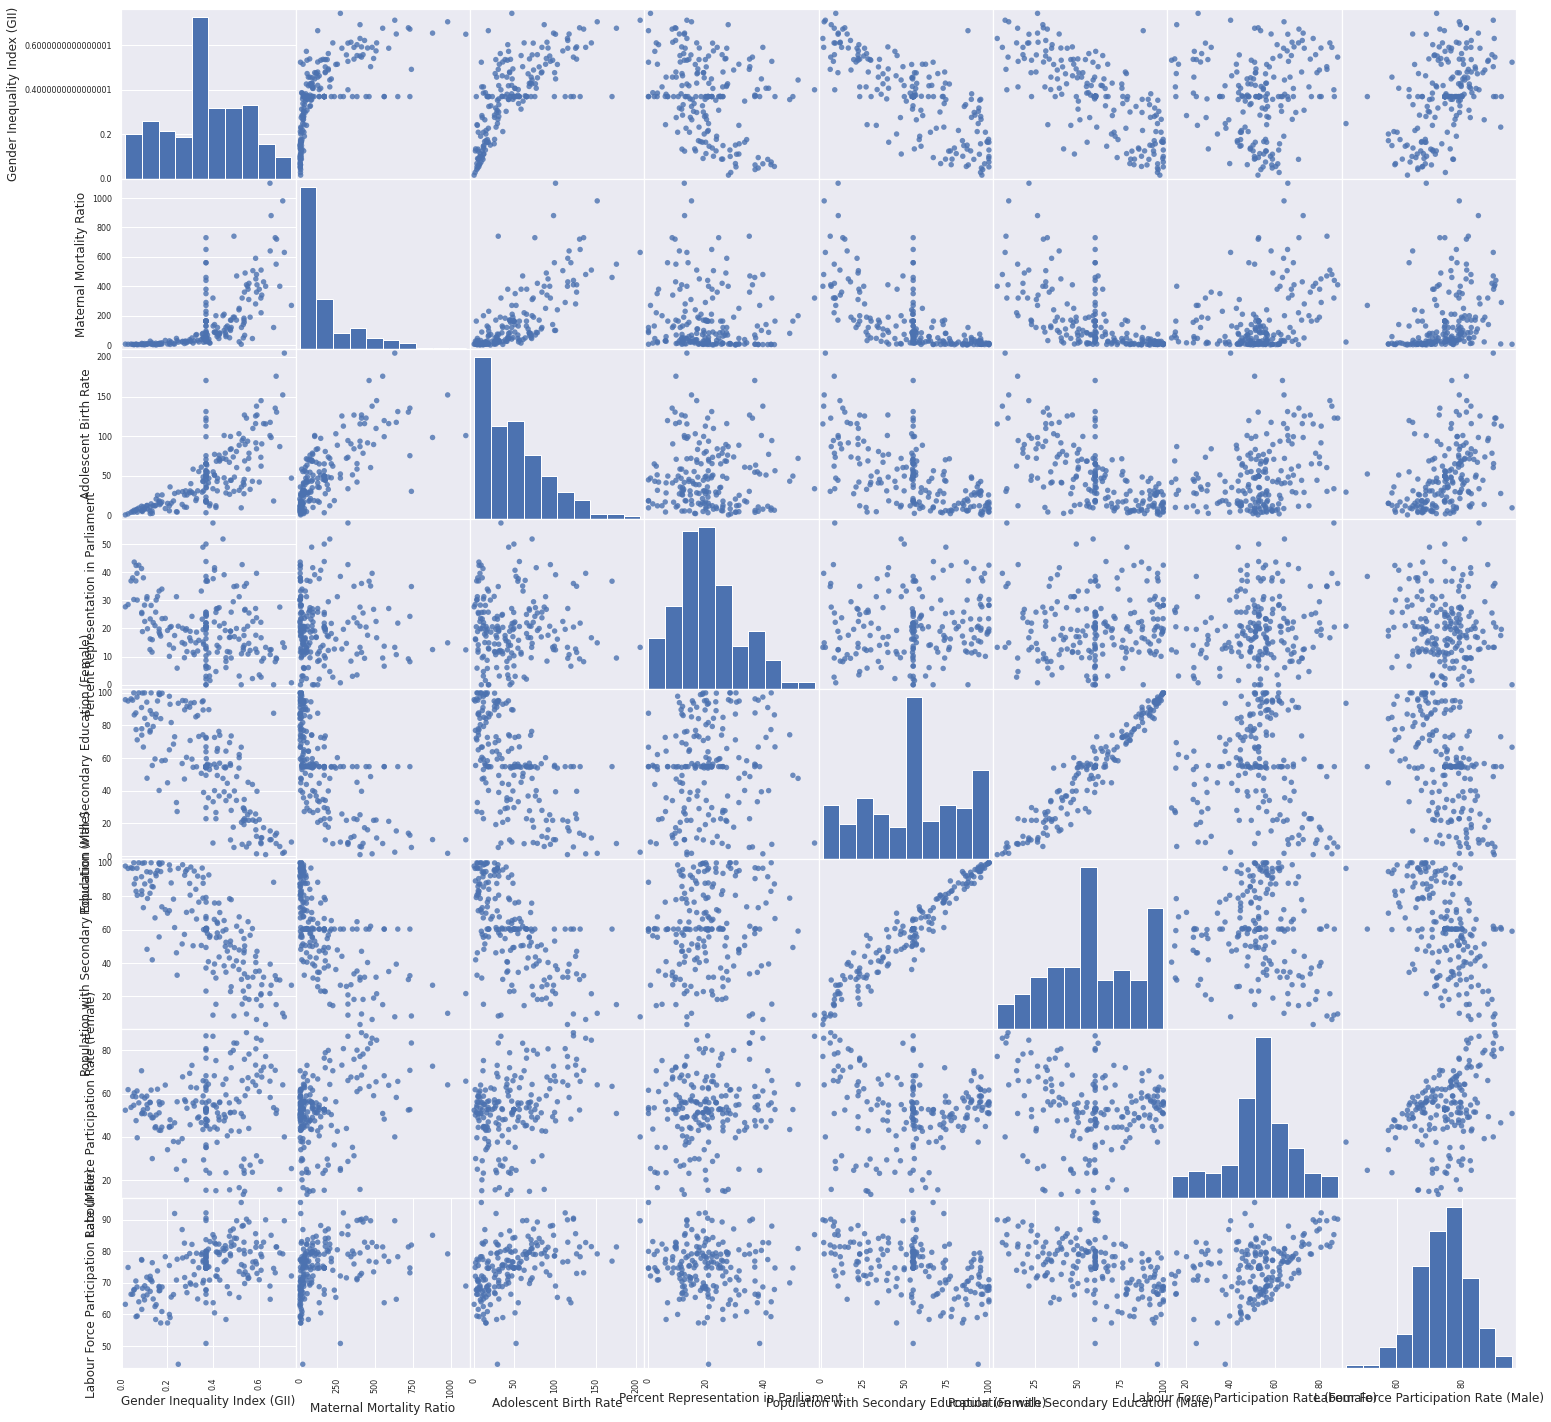

In [26]:
# for  gender_inequality variable
plt.figure()
pd.plotting.scatter_matrix(df_.iloc[:,1:9], figsize=(25, 25), marker='o', hist_kwds={'bins': 10}, s = 30, alpha = 0.8)
plt.show()

<Figure size 864x576 with 0 Axes>

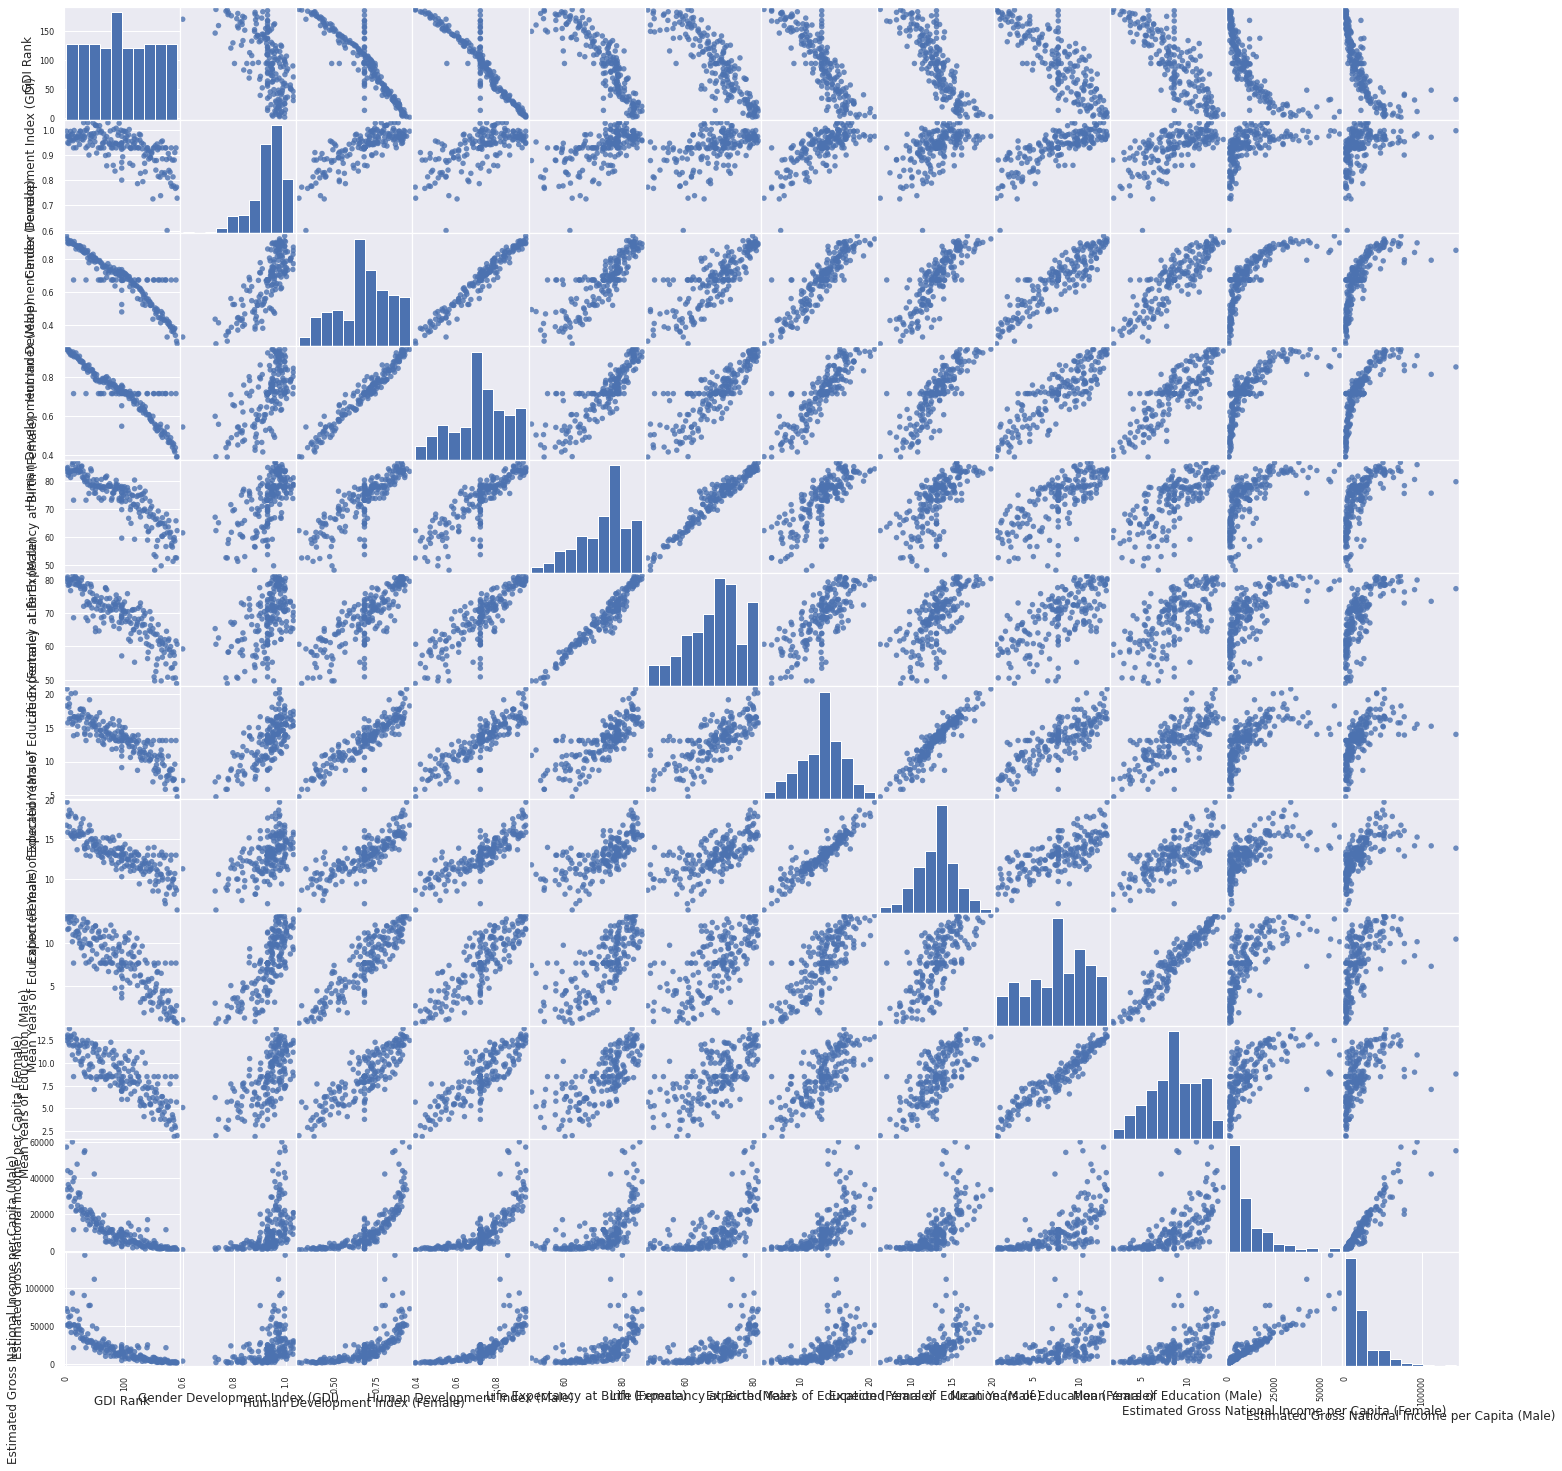

In [27]:
# for gender_development variable
plt.figure()
pd.plotting.scatter_matrix(df_.iloc[:,9:], figsize=(25, 25), marker='o', hist_kwds={'bins': 10}, s = 30, alpha = 0.8)
plt.show()

#### Scaling and Normalizing the Dataset

Since the distribution of our dataset for some vairable or features is skewed we are performing min-max scaling (similar to normalization) and shift methods to see its impacts


In [28]:
sub_df = df_.select_dtypes(include='float')

from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
dfnorm = ss.fit_transform(sub_df)
dfnormfloat = pd.DataFrame(dfnorm, columns=sub_df.columns)
dfnorm = pd.concat([dfnormfloat, df_['Country']], axis=1)
dfnorm.head()

,GII Rank,Gender Inequality Index (GII),Maternal Mortality Ratio,Adolescent Birth Rate,Percent Representation in Parliament,Population with Secondary Education (Female),Population with Secondary Education (Male),Labour Force Participation Rate (Female),Labour Force Participation Rate (Male),GDI Rank,...,Human Development Index (Male),Life Expectancy at Birth (Female),Life Expectancy at Birth (Male),Expected Years of Education (Female),Expected Years of Education (Male),Mean Years of Education (Female),Mean Years of Education (Male),Estimated Gross National Income per Capita (Female),Estimated Gross National Income per Capita (Male),Country
0,0.00e+00,0.07,2.73e-03,3.53e-02,0.69,0.97,0.97,0.64,0.48,0.00e+00,...,1.00,0.92,0.95,0.84,0.79,0.97,0.89,0.95,0.50,Norway
1,5.35e-03,0.13,4.55e-03,5.63e-02,0.53,0.94,0.94,0.61,0.54,5.35e-03,...,1.00,0.94,0.97,1.00,1.00,1.00,0.92,0.56,0.35,Australia
2,1.07e-02,0.02,4.55e-03,6.37e-03,0.50,0.95,0.96,0.65,0.60,1.07e-02,...,1.00,0.95,0.99,0.69,0.72,0.87,0.94,0.73,0.48,Switzerland
3,1.60e-02,0.04,3.64e-03,2.20e-02,0.66,0.95,0.96,0.61,0.43,1.60e-02,...,0.98,0.88,0.91,0.91,0.88,0.98,0.91,0.60,0.36,Denmark
4,2.14e-02,0.06,4.55e-03,2.74e-02,0.64,0.88,0.90,0.60,0.51,2.14e-02,...,1.00,0.91,0.95,0.83,0.87,0.88,0.87,0.49,0.43,Netherlands


#### Checking Correlation after Scaling

##### Gender Development Correlation Matrix After Scaling

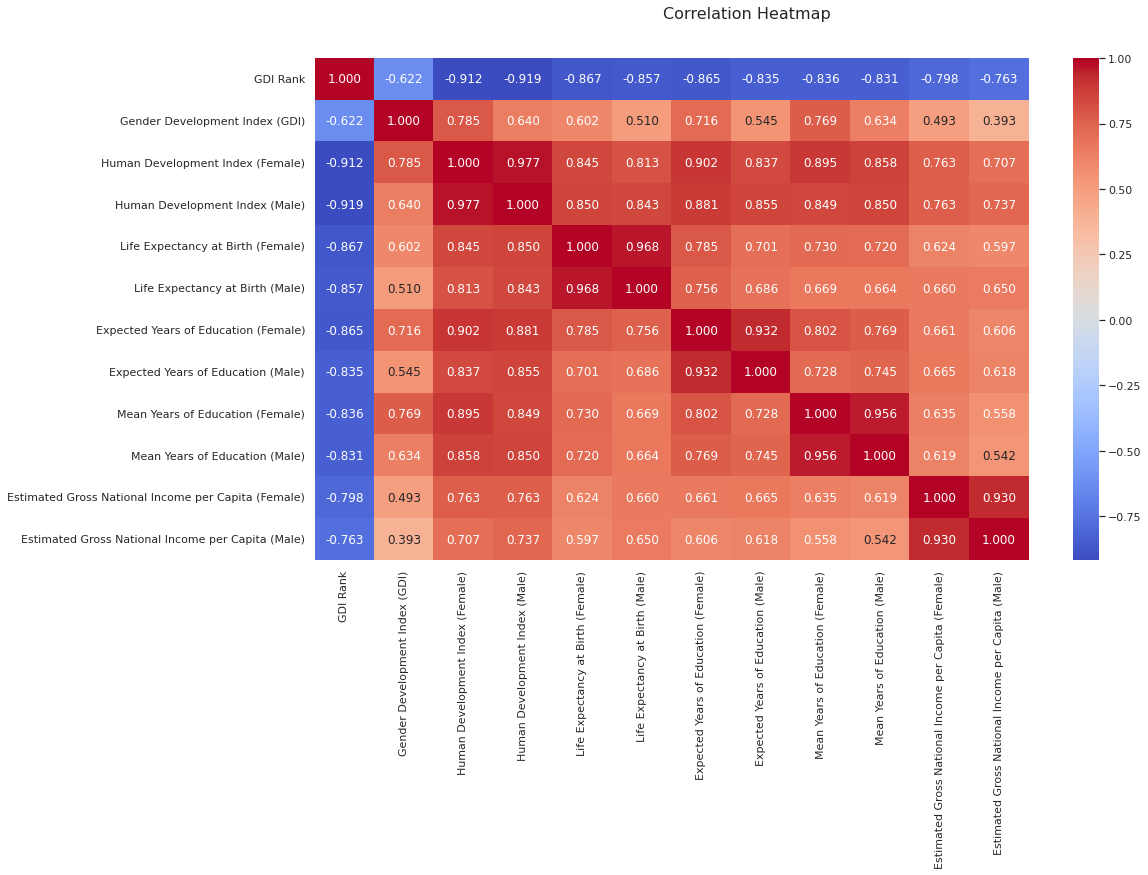

In [29]:
 #corrolation heatmap for gender_development variable
fig, ax = plt.subplots(figsize=(16, 9))
corr = dfnormfloat.iloc[:,9:].corr()
htmap = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm",fmt='.3f')
fig.subplots_adjust(top=0.90)
c= fig.suptitle('Correlation Heatmap', fontsize=16)

##### Gender Inequality Correlation Matrix after Scaling 

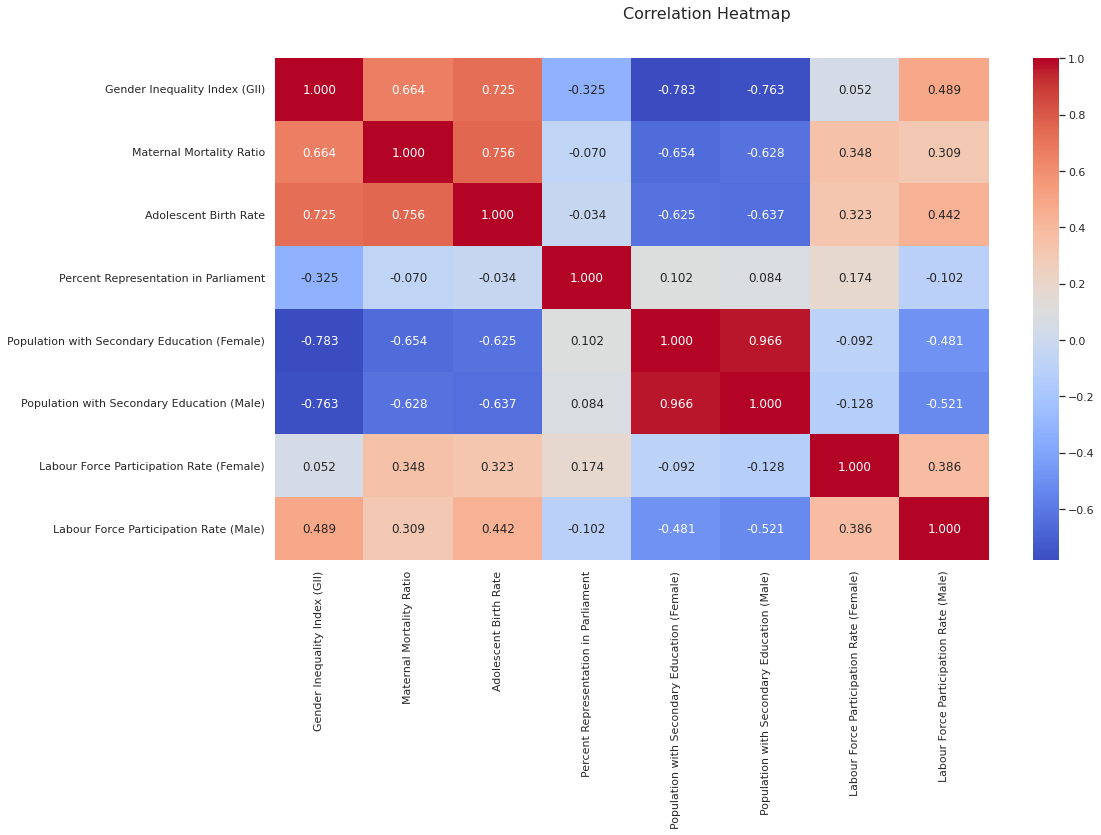

In [30]:
 
 #corrolation heatmap  for Gender Inequality
fig, ax = plt.subplots(figsize=(16, 9))
corr = dfnormfloat.iloc[:,1:9].corr()
htmap = sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm",fmt='.3f')
fig.subplots_adjust(top=0.90)
c= fig.suptitle('Correlation Heatmap', fontsize=16)

#### Plot Selection 1 - 3d Scatter Plot with Size and Color

In [31]:
#preparing data for plotly

data1 = px.scatter_3d(
    dfnorm,
    x='Gender Inequality Index (GII)', 
    y='Population with Secondary Education (Female)', 
    z='Labour Force Participation Rate (Female)',
    color='Adolescent Birth Rate',
    size='Maternal Mortality Ratio',
    title='The Reason Behind Adolescent Birth Rate',
    size_max=50,
    )
    
data = data1
layout = go.Layout(
    title='The Reason Behind Adolescent Birth Rate',
    scene=dict(
        xaxis=dict(
            title='Gender Inequality Index (GII)'
        ),
        yaxis=dict(
            title='Population With Secondary Education (Female)'
        ),
        zaxis=dict(
            title='Labour Force Participation Rate (Female)'
        )
    ),
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()

#### Plot Selection 2 - Bar Plot foir Labour Participation



In [32]:

fig = px.bar(dfnorm,x='Country', y=['Labour Force Participation Rate (Female)','Labour Force Participation Rate (Male)'], title="Comparing Labour Force Participation")

fig.show()

#### Plot Selection 3
We used Scatter plot to evluate the relation of 'Mean years of Education' and 'Life Expectancy at Birth' on 'Estimate GNI' and 'HDI' for both *male* and *female*



In [33]:
dfnorm.sort_values(by=['Mean Years of Education (Female)', 'Life Expectancy at Birth (Female)', 
                 'Estimated Gross National Income per Capita (Female)', 'Human Development Index (Female)'], inplace=True)

 
fig=px.scatter(dfnorm, x="Mean Years of Education (Female)", y="Life Expectancy at Birth (Female)", color="Estimated Gross National Income per Capita (Female)",
                  size="Human Development Index (Female)",title='Relation ship between Life Expectancy , Mean Years of Education, Gross NationalIncome and HDI (Female)',size_max=10)


fig.show()

In [34]:
fig=px.scatter(dfnorm, x="Mean Years of Education (Male)", y="Life Expectancy at Birth (Male)", color="Estimated Gross National Income per Capita (Male)", size="Human Development Index (Male)",title='Relation ship between Life Expectancy , Mean Years of Education, Gross NationalIncome and HDI (Male)',size_max=10)
fig.show()
   

#### Plot 4 - Bar Chart (Gender Development in Continent)

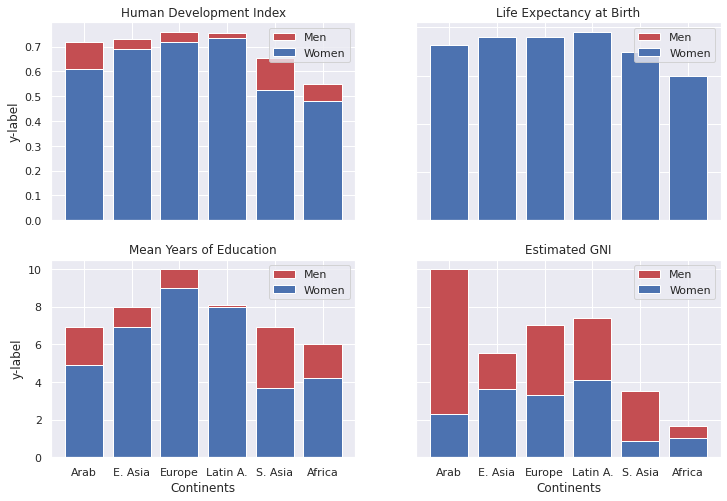

In [35]:
countries = ['Arab', 'E. Asia', 'Europe', 'Latin A.', 'S. Asia', 'Africa']


# fig = plt.figure(figsize=(5,5))
# ax = fig.add_axes([0,0,1,1])
ax.bar(countries, df_['Human Development Index (Male)'][-7:-1], color='r')
ax.bar(countries, df_['Human Development Index (Female)'][-7:-1],bottom=0, color='b')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
# ax.set_xticks(df_['Country'][-7:-1],)
# ax.set_yticks(np.arange(0, 81, 10))

fig, axs = plt.subplots(2, 2)
axs[0, 0].bar(countries, df_['Human Development Index (Male)'][-7:-1], color='r')
axs[0, 0].bar(countries, df_['Human Development Index (Female)'][-7:-1], color='b')
axs[0, 0].set_title('Human Development Index')


axs[0, 1].bar(countries, df_['Life Expectancy at Birth (Male)'][-7:-1] , color='r')
axs[0, 1].bar(countries, df_['Life Expectancy at Birth (Female)'][-7:-1] , color='b')
# axs[0, 1].set_title('Axis [0, 1]')
axs[0,1].set_title('Life Expectancy at Birth')


axs[1, 0].bar(countries, df_['Mean Years of Education (Male)'][-7:-1] , color='r')
axs[1, 0].bar(countries, df_['Mean Years of Education (Female)'][-7:-1] , color='b')
axs[1, 0].set_title('Mean Years of Education')

axs[1, 1].bar(countries, df_['Estimated Gross National Income per Capita (Male)'][-7:-1] , color='r')
axs[1, 1].bar(countries, df_['Estimated Gross National Income per Capita (Female)'][-7:-1], color='b')
axs[1, 1].set_title('Estimated GNI')

for ax in axs.flat:
    ax.set(xlabel='Continents', ylabel='y-label')
    ax.legend(labels=['Men', 'Women'])

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# ax.legend(labels=['Men', 'Women'])
plt.show()

#### Plot 5 Pie - Charts (GNI & GII in Continents)

In [36]:
fig = px.pie(values=df1['Gender Inequality Index (GII)'][-7:], names=df1['Country'][-7:], title="Gender Inequality Index in Continents")

fig.show()

In [37]:
fig = px.pie(values=df2['Gender Development Index (GDI)'][-7:], names=df2['Country'][-7:], title="Gender Development Index in Continents")

fig.show()